In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn import preprocessing as pre, svm
from sklearn.model_selection import train_test_split

In [12]:
df = pd.read_csv("input/weather3.csv")
df.head()

,tem,rain,rain%,cloud,pressure,wind,gust,forecast,dateTime,Jan,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,27,0.0,0,43,1012,9,16,14,2009101300,0,...,0,0,0,0,0,0,0,1,0,0
1,25,0.1,0,70,1011,13,22,1,2009101303,0,...,0,0,0,0,0,0,0,1,0,0
2,25,0.0,0,38,1012,8,14,14,2009101306,0,...,0,0,0,0,0,0,0,1,0,0
3,25,15.9,0,82,1013,13,22,3,2009101309,0,...,0,0,0,0,0,0,0,1,0,0
4,25,17.9,0,99,1011,10,16,3,2009101312,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
x = np.array(df.drop(['wind', 'dateTime'], axis=1))
y = df['wind']
x,y

(array([[27. ,  0. ,  0. , ...,  1. ,  0. ,  0. ],
        [25. ,  0.1,  0. , ...,  1. ,  0. ,  0. ],
        [25. ,  0. ,  0. , ...,  1. ,  0. ,  0. ],
        ...,
        [19. ,  0. ,  0. , ...,  0. ,  0. ,  1. ],
        [18. ,  0. ,  0. , ...,  0. ,  0. ,  1. ],
        [18. ,  0. ,  0. , ...,  0. ,  0. ,  1. ]]),
 0         9
 1        13
 2         8
 3        13
 4        10
          ..
 35675     6
 35676     6
 35677     7
 35678     9
 35679     7
 Name: wind, Length: 35680, dtype: int64)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
            x, y, test_size=0.1,random_state=0)
print('X_train', x_train.shape)
print('X_test', x_test.shape)

X_train (32112, 19)
X_test (3568, 19)


In [15]:
scaler = pre.StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
try:
    SVR_model = joblib.load('modelWind.pkl')
except:
    print("Failed, training model.....")
    SVR_model = svm.SVR(kernel='rbf', C=100, gamma=0.1).fit(
        x_train_scaled, y_train)
    joblib.dump(SVR_model, 'modelWind.pkl')
print("training model sucsess")

training model sucsess


In [17]:
predict_y_array = SVR_model.predict(x_test_scaled)
score = SVR_model.score(x_test_scaled, y_test)

do có sự phụ thuộc lớn vào cột gió giật nên dự báo tốc độ gió khá chuẩn
kết quả: 93% 

In [18]:
print("Score of", score)

Score of 0.9366358911161226


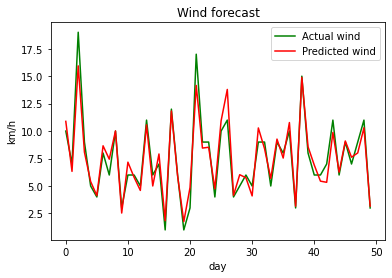

In [19]:

y_test_np = np.array(y_test[0:50])
plt.plot(y_test_np, color='g', label="Actual " + 'wind')
plt.plot(predict_y_array[0:50], color='r', label="Predicted " + 'wind')

plt.xlabel('day')
plt.ylabel('km/h')
plt.title('Wind forecast')
plt.legend()
plt.show()

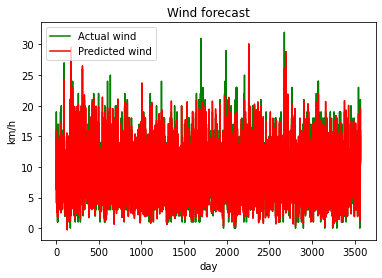

In [20]:
y_test_np = np.array(y_test)
plt.plot(y_test_np, color='g', label="Actual " + 'wind')
plt.plot(predict_y_array, color='r', label="Predicted " + 'wind')

plt.xlabel('day')
plt.ylabel('km/h')
plt.title('Wind forecast')
plt.legend()
plt.show()